# A Sales Dataset Analysis of a Retail outlet in the U.S.

## By Barry Quist

### Questions for Analysing dataset
1. What is the most and least expensive product?
2. What are the best and worst sellers of the outlet for the year 2019?
3. What is the sales trend of the outlet for 2019?
4. Which cities had the most and least purchases?
5. What is the distribution of products sold across these cities?
6. What is the distribution of products sold across month?
7. What time of the day were orders made most?
8. What is the distribution of orders during the time of day across Month?
9. What is the distribution of orders during the time of day across Cities?

### GATHERING DATA

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [2]:
# load dataset

df_sales = pd.read_csv('sales_data.csv')

## ASSESSING DATA

In [3]:
df_sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df_sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df_sales.shape


(185950, 11)

In [7]:
# check for duplicates

sum(df_sales.duplicated())

0

## CLEANING DATA

In [8]:
# Make a copy of original dataset and work with copy
df_sales_clean = df_sales.copy()

In [9]:
df_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [10]:
# drop unnecessary columns
x_columns = ['Unnamed: 0', 'Order ID']
def drop_columns(cols, Dframe):
    for col in cols:
        Dframe.drop(columns=col, axis=1, inplace=True)
        
drop_columns(x_columns, df_sales_clean)

In [11]:
# check if columns have been dropped
df_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Order Date        185950 non-null  object 
 4   Purchase Address  185950 non-null  object 
 5   Month             185950 non-null  int64  
 6   Sales             185950 non-null  float64
 7   City              185950 non-null  object 
 8   Hour              185950 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 12.8+ MB


In [12]:
# change values in Month column to reflect actual Month names
df_sales_clean['Month'] = df_sales_clean['Month'].apply(lambda x: calendar.month_abbr[x])

In [13]:
df_sales_clean.sample(10)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
18419,AAA Batteries (4-pack),2,2.99,2019-12-18 13:55:00,"595 8th St, New York City, NY 10001",Dec,5.98,New York City,13
173172,Macbook Pro Laptop,1,1700.00,2019-06-26 18:45:00,"276 Meadow St, Portland, OR 97035",Jun,1700.00,Portland,18
134877,Bose SoundSport Headphones,1,99.99,2019-10-04 18:16:00,"846 Forest St, Los Angeles, CA 90001",Oct,99.99,Los Angeles,18
73687,iPhone,1,700.00,2019-08-01 10:17:00,"740 Church St, Atlanta, GA 30301",Aug,700.00,Atlanta,10
40308,20in Monitor,1,109.99,2019-04-21 13:49:00,"796 1st St, Portland, OR 97035",Apr,109.99,Portland,13
4489,Bose SoundSport Headphones,1,99.99,2019-12-25 18:00:00,"830 Walnut St, Los Angeles, CA 90001",Dec,99.99,Los Angeles,18
52303,Bose SoundSport Headphones,1,99.99,2019-02-07 10:25:00,"959 6th St, Los Angeles, CA 90001",Feb,99.99,Los Angeles,10
59196,Lightning Charging Cable,1,14.95,2019-03-17 12:49:00,"888 7th St, Austin, TX 73301",Mar,14.95,Austin,12
138894,AA Batteries (4-pack),1,3.84,2019-01-21 08:56:00,"630 Madison St, Atlanta, GA 30301",Jan,3.84,Atlanta,8
74339,Lightning Charging Cable,1,14.95,2019-08-10 08:21:00,"959 Church St, Dallas, TX 75001",Aug,14.95,Dallas,8


In [14]:
# Rename columns
df_sales_clean.rename(columns = {'Order Date':'Order_Date','Purchase Address':'Purchase_Address',
                                 'Quantity Ordered':'Quantity','Price Each':'Price'}, inplace=True)


In [15]:
df_sales_clean.tail(1)

,Product,Quantity,Price,Order_Date,Purchase_Address,Month,Sales,City,Hour
185949,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",Jun,2.99,Atlanta,14


In [16]:
# convert Order_Date column to datetime datatype
df_sales_clean.Order_Date = pd.to_datetime(df_sales_clean.Order_Date)

In [17]:
df_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  object        
 1   Quantity          185950 non-null  int64         
 2   Price             185950 non-null  float64       
 3   Order_Date        185950 non-null  datetime64[ns]
 4   Purchase_Address  185950 non-null  object        
 5   Month             185950 non-null  object        
 6   Sales             185950 non-null  float64       
 7   City              185950 non-null  object        
 8   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [18]:
# Categorizing the values in the Hour column by time of day (Dawn, Morning, Afternoon, Evening/Night)
df_sales_clean['Hour'] = pd.cut(df_sales_clean['Hour'], bins=[0, 5.99, 11.99, 16.99, 23.99], right=False, labels=['Dawn','Morning', 'Afternoon', 'Evening/Night'])
df_sales_clean['Hour']

0                  Dawn
1               Morning
2         Evening/Night
3             Afternoon
4             Afternoon
              ...      
185945    Evening/Night
185946    Evening/Night
185947    Evening/Night
185948    Evening/Night
185949        Afternoon
Name: Hour, Length: 185950, dtype: category
Categories (4, object): ['Dawn' < 'Morning' < 'Afternoon' < 'Evening/Night']

In [19]:
df_sales_clean.sample(5)

,Product,Quantity,Price,Order_Date,Purchase_Address,Month,Sales,City,Hour
137032,Bose SoundSport Headphones,1,99.99,2019-01-22 19:48:00,"154 Jackson St, Boston, MA 02215",Jan,99.99,Boston,Evening/Night
4834,Wired Headphones,1,11.99,2019-12-19 20:51:00,"525 Adams St, Atlanta, GA 30301",Dec,11.99,Atlanta,Evening/Night
119045,Wired Headphones,2,11.99,2019-10-20 10:39:00,"180 Elm St, San Francisco, CA 94016",Oct,23.98,San Francisco,Morning
72700,USB-C Charging Cable,1,11.95,2019-08-31 21:21:00,"922 Wilson St, San Francisco, CA 94016",Aug,11.95,San Francisco,Evening/Night
65546,34in Ultrawide Monitor,1,379.99,2019-03-23 08:10:00,"883 North St, Atlanta, GA 30301",Mar,379.99,Atlanta,Morning


## VISUALIZING DATA

## Question 1: What is the most and least expensive product?

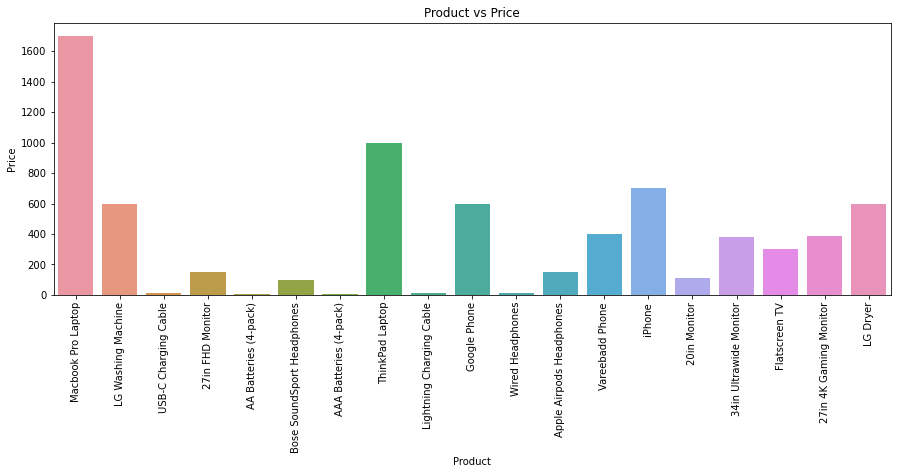

In [20]:
plt.figure(figsize=(15,5))
x = sb.barplot(data = df_sales_clean, x = 'Product', y = 'Price')
plt.title('Product vs Price')
plt.xticks(rotation=90);

### Observation
- The Macbook Pro Laptop was the most expensive product in the outlet.
- The AAA Batteries (4-pack) was the least expensive item in the outlet.


## Question 2: What are the best and worst sellers of the outlet for the year 2019?

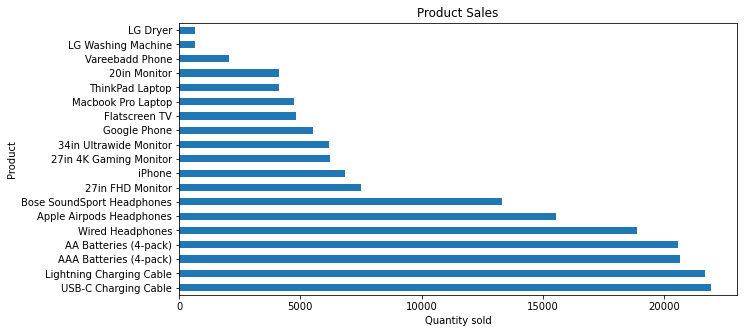

In [21]:
df_sales_clean.Product.value_counts().plot(kind='barh', figsize=(10,5))
plt.title('Product Sales')
plt.xlabel('Quantity sold')
plt.ylabel('Product');

### Observation
- The USB-C charging cable was the most purchased product. 
- On the other hand, the LG Dryer was the least sold product.

## Question 3: What is the sales trend of the outlet for 2019?

In [22]:
df_sales_clean.Month.value_counts()

Dec    24984
Oct    20282
Apr    18279
Nov    17573
May    16566
Mar    15153
Jul    14293
Jun    13554
Feb    11975
Aug    11961
Sep    11621
Jan     9709
Name: Month, dtype: int64

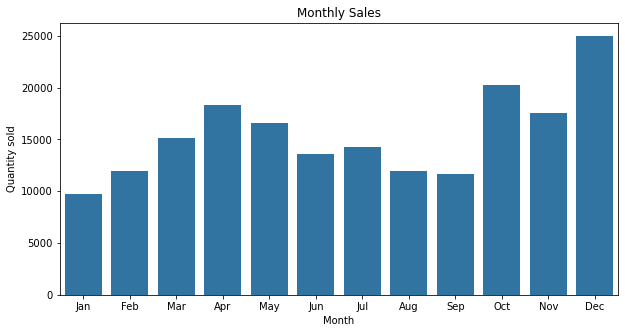

In [36]:
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
base_color = sb.color_palette()[0]

plt.figure(figsize=(10,5))
sb.countplot(data=df_sales_clean, x='Month', color=base_color, order=order)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity sold');

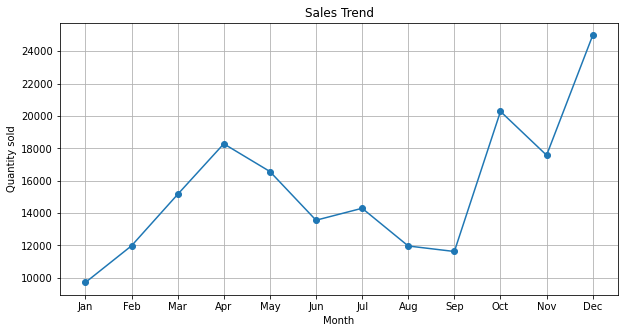

In [65]:
Quantity = [9707, 11975, 15153, 18279, 16566, 13554, 14293, 11961, 11621, 20282, 17573, 24984]
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10,5))
plt.plot(Month, Quantity, marker='o')
plt.title('Sales Trend')
plt.xlabel('Month')
plt.ylabel('Quantity sold')
plt.grid(True)
plt.show()

### Observation
- December had the most products sold. 
- January had the least number of products sold

## Question 4: Which cities had the most and least products purchased?

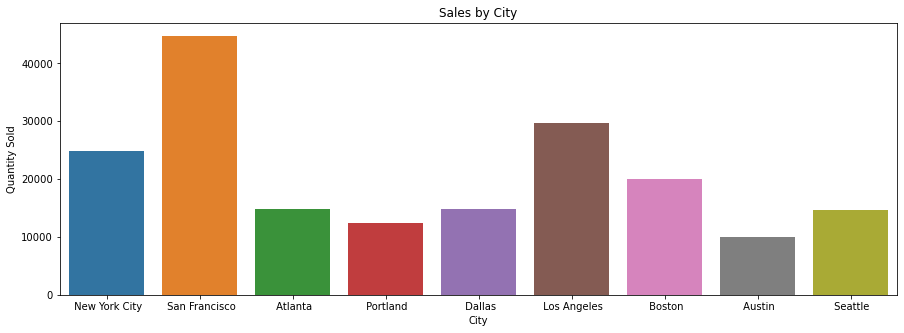

In [26]:
plt.figure(figsize=(15,5))
sb.countplot(data=df_sales_clean, x='City')
plt.ylabel('Quantity Sold')
plt.title('Sales by City');

### Observation
- It is observed that San Francisco made the most purchases. 
- Contrary to this Austin made the least purchase of products from the outlet.

## Question 5: What is the distribution of products sold across cities?

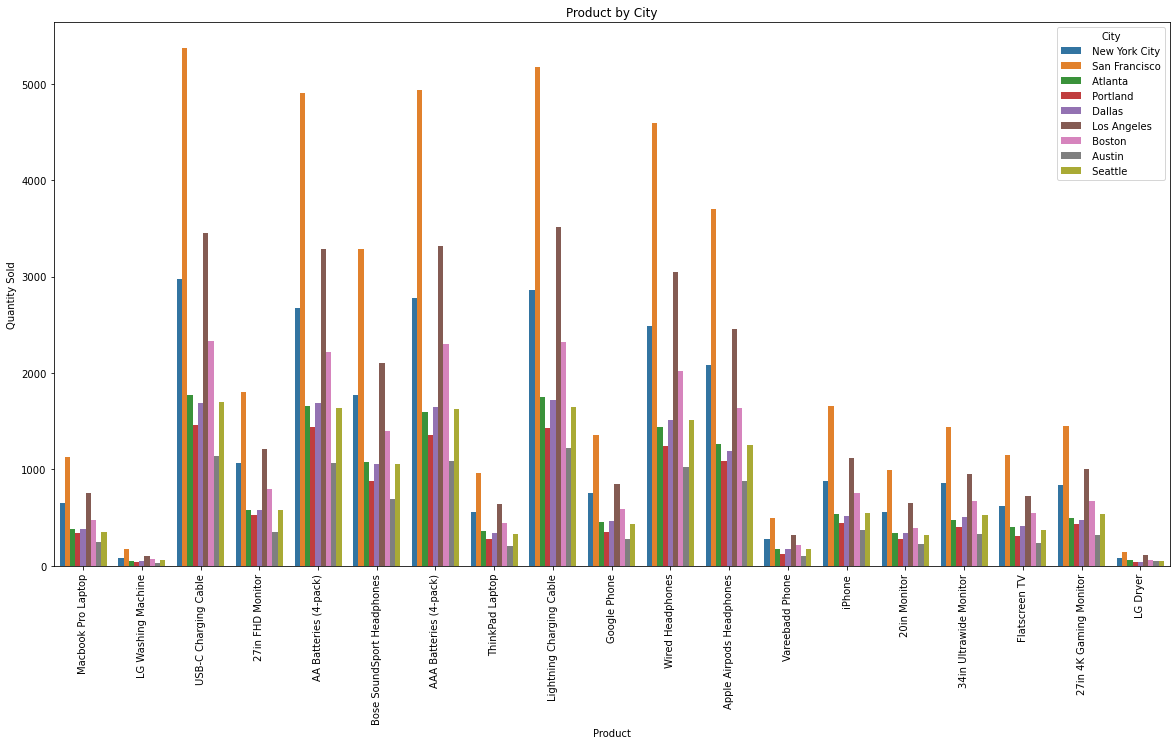

In [27]:
plt.figure(figsize=(20,10))
sb.countplot(data = df_sales_clean, x = 'Product', hue = 'City')
plt.ylabel('Quantity Sold')
plt.title('Product by City')
plt.xticks(rotation=90);

### Observation
- It is observed that San Francisco had the largest margins of all product purchases across all the cities. 


## Question 6: What is the distribution of products sold across month?

In [28]:
# Use group_by() and size() to get the number of products and month as a pandas Series

ct_counts = df_sales_clean.groupby(['Product', 'Month']).size()
ct_counts

Product       Month
20in Monitor  Apr      388
              Aug      258
              Dec      567
              Feb      245
              Jan      215
                      ... 
iPhone        Mar      537
              May      640
              Nov      664
              Oct      715
              Sep      396
Length: 228, dtype: int64

In [29]:
# # Use Series.reset_index() to convert a series into a dataframe object

ct_counts = ct_counts.reset_index(name='count')
ct_counts

,Product,Month,count
0,20in Monitor,Apr,388
1,20in Monitor,Aug,258
2,20in Monitor,Dec,567
3,20in Monitor,Feb,245
4,20in Monitor,Jan,215
...,...,...,...
223,iPhone,Mar,537
224,iPhone,May,640
225,iPhone,Nov,664
226,iPhone,Oct,715


In [30]:
# # Use DataFrame.pivot() to rearrange the data, to have Product on rows

ct_counts = ct_counts.pivot(index = 'Product', columns = 'Month', values = 'count')
ct_counts

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Product,,,,,,,,,,,,
20in Monitor,388,258,567,245,215,324,321,324,338,419,428,274
27in 4K Gaming Monitor,564,438,863,425,313,483,451,478,541,575,719,380
27in FHD Monitor,733,485,959,471,421,603,561,606,688,710,790,480
34in Ultrawide Monitor,651,380,846,416,313,460,454,521,543,549,670,378
AA Batteries (4-pack),2063,1357,2721,1276,1038,1556,1543,1674,1822,1971,2241,1315
AAA Batteries (4-pack),1991,1341,2831,1321,1084,1558,1452,1647,1892,2003,2239,1282
Apple Airpods Headphones,1509,999,2056,1010,813,1212,1154,1313,1354,1502,1662,965
Bose SoundSport Headphones,1279,872,1807,831,659,1051,973,1184,1167,1238,1440,824
Flatscreen TV,459,331,663,312,244,396,366,359,399,457,523,291


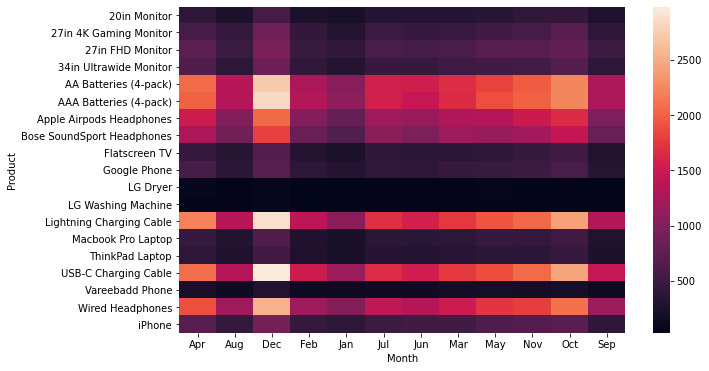

In [31]:
plt.figure(figsize=(10,6))
sb.heatmap(ct_counts);

### Observation
 December saw a lot of products being purchased.


## Question 7: What time of the day were orders made most?

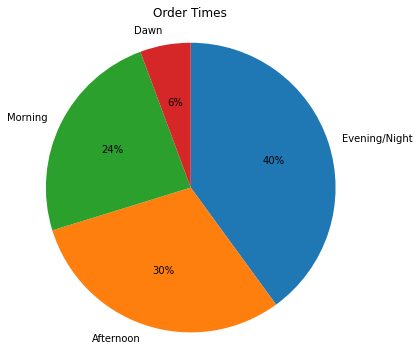

In [62]:
sorted_counts = df_sales_clean['Hour'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle = 90, counterclock = False)
plt.title('Order Times')
plt.axis('square');

### Observation 
- It is observed that 40% of orders were made in the Evenings/Nights, 30% in the afternoons, 24% in the mornings and 6% at Dawn.
- There was also a relative increase in purchase orders as the day went by i.e from Dawn to Evening/Night

## Question 8: What is the distribution of orders during the time of day across Month?

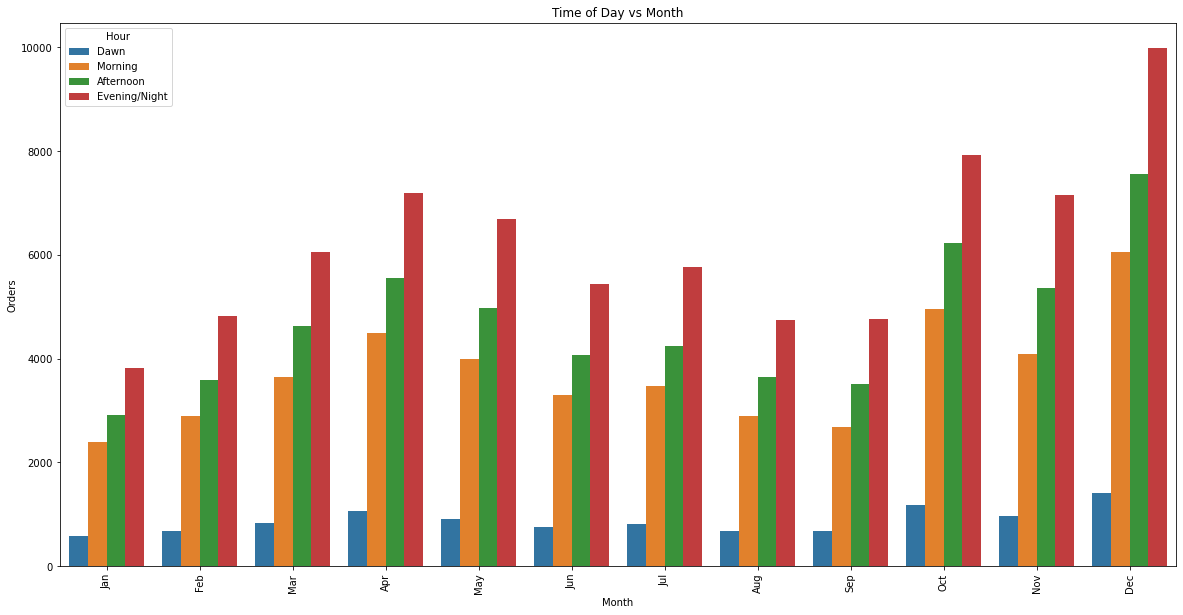

In [47]:
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(20,10))
sb.countplot(data = df_sales_clean, x = 'Month', order=order, hue = 'Hour')
plt.ylabel('Orders')
plt.title('Time of Day vs Month')
plt.xticks(rotation=90);

### Observation 
- It is observed from the plot above that a lot more orders were placed in the Evenings/Night all throughout the year

## Question 8: What is the distribution of orders during the time of day across Cities?

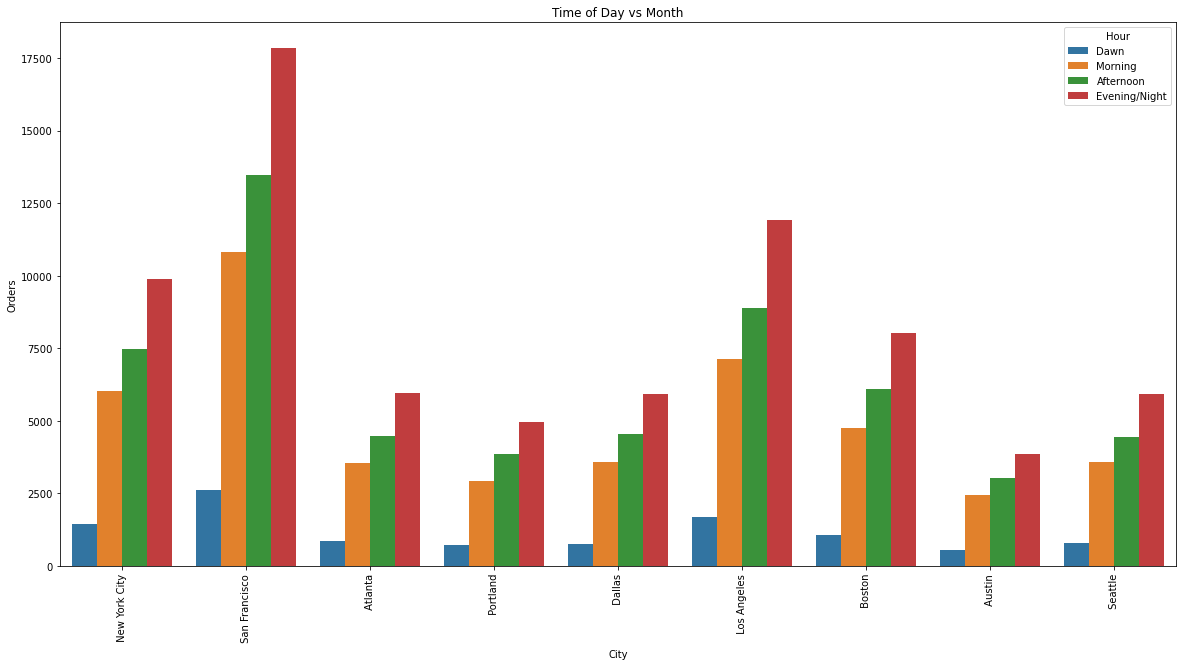

In [64]:
plt.figure(figsize=(20,10))
sb.countplot(data = df_sales_clean, x = 'City', hue = 'Hour')
plt.ylabel('Orders')
plt.title('Time of Day vs Month')
plt.xticks(rotation=90);

### Observation 
- It is observed from the plot above that all cities had a lot more orders/purchases placed in the Evenings/Nights.

## Conclusion

<p>In conclusion, San Francisco was the city with the highest orders/purchases compared to the other cities. It was observed that there were a lot of purchases mostly for AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable and the Lightning Charging Cable.<p/>
<p>All these were mostly purchased during December in the afternoons and evenings/nights. Could this be because of the Christmas festivities during that period? Although San Francisco is not as densely populated as New York and Los Angeles, it still had the most purchases. So what could be the reason for this? Further research yeilded that all cities equally had activities for December. Therefore we conclude generally that the reason for most purchases by all cities in December was because of Christmas festivities. It is assumed that people purchased products to be wrapped as gifts for loved ones.<p/>
Again a question is asked "But why are the most purchased products by San Francisco the least expensive ones?". Further research revealed that Los Angeles, New York and San Francisco were in the [top 10 most expensive cities in the US][1].  This can be a reason to why the least expensive products were purchased, mostly because one's income might be used to pay for bills and other living expenditures and due to the high cost of living, one might not have enough to spend on pricey items.<p/>
<p>However from the analysis, we can note that the outlet's peak period were in the Evenings/Nights since there were alot more orders/purchases during that time of the day.<p/> 

[1]: https://www.investopedia.com/articles/personal-finance/080916/top-10-most-expensive-cities-us.asp#:~:text=In%20the%20U.S.%2C%20New%20York,the%20world%27s%20most%20expensive%20cities